In [129]:
#Import
import pandas as pd
import matplotlib.pyplot as plt


#Read in long CSV of TDF Jersey Winners
df = pd.read_csv('TDF_AllTimeJerseys.csv')

Text(0.5, 0.98, '(Lance Armstrong GC wins included)')

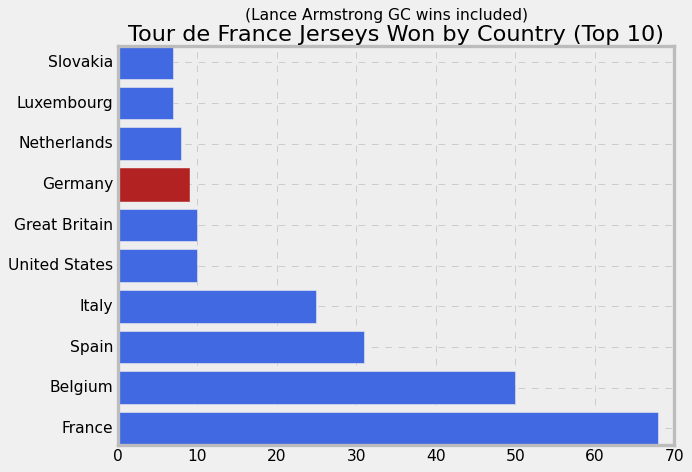

In [138]:
#--------------------------------------------------------------------------
# Bar Chart to represent the nationalities of TDF Jersey Winners (All Time)
#--------------------------------------------------------------------------

#Build dataframe to be used for the chart
df_bar2 = pd.DataFrame(df[['Country']].value_counts(dropna=True,
                     sort=True).rename_axis('Country').reset_index(name='JerseyWins'))

df_bar = df_bar2.iloc[0:10] #Slice to get top 10

#Plot Basics
barlist = plt.barh(df_bar['Country'], df_bar["JerseyWins"], color = "royalblue")

#Make Plot Readable
plt.title("Tour de France Jerseys Won by Country (Top 10)")
barlist[6].set_color('firebrick')


plt.style.use('bmh')
plt.suptitle("(Lance Armstrong GC wins included)")

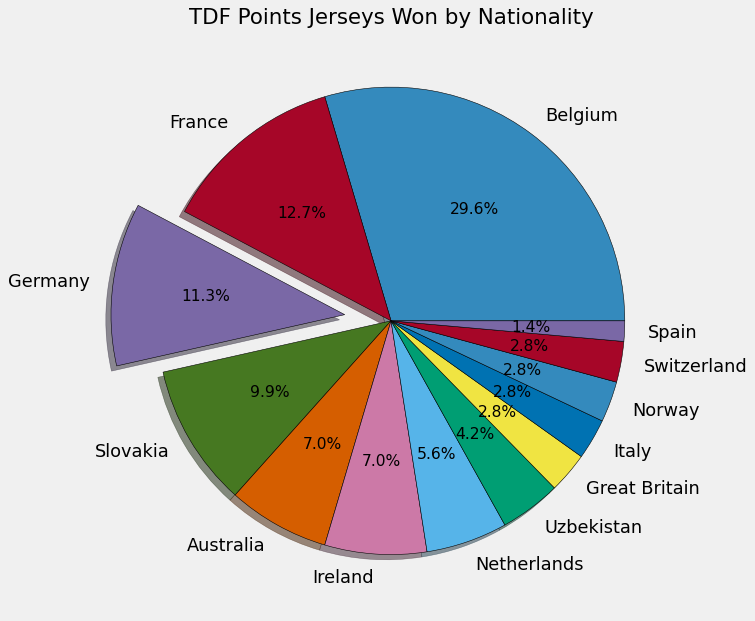

In [140]:
#-------------------------------------------------------------
#--Pie Chart showing proprotion of Green Jersey Wins by Nation
#-------------------------------------------------------------

#Get df of just sprinters from main df
dfs = df[df['Jersey']=="Green"].drop(columns=['Jersey'])

#Organize by number of wins by nationality
dfs_pie = pd.DataFrame(dfs[["Country"]].value_counts(dropna=True, 
        sort=True).rename_axis('Country').reset_index(name='JerseyWins'))

explode = [0,0,0.2,0,0,0,0,0,0,0,0,0,0] #Set Values for explode

dfs_pie['Explode'] = explode #Adding column to the df

#Plot Pie Chart
plt.pie(dfs_pie["JerseyWins"], labels=dfs_pie['Country'], shadow = True,
         autopct = '%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

#Make Plot More Readable
plt.title("TDF Points Jerseys Won by Nationality")
plt.style.use('seaborn-v0_8-poster')

(16.0, 29.0)

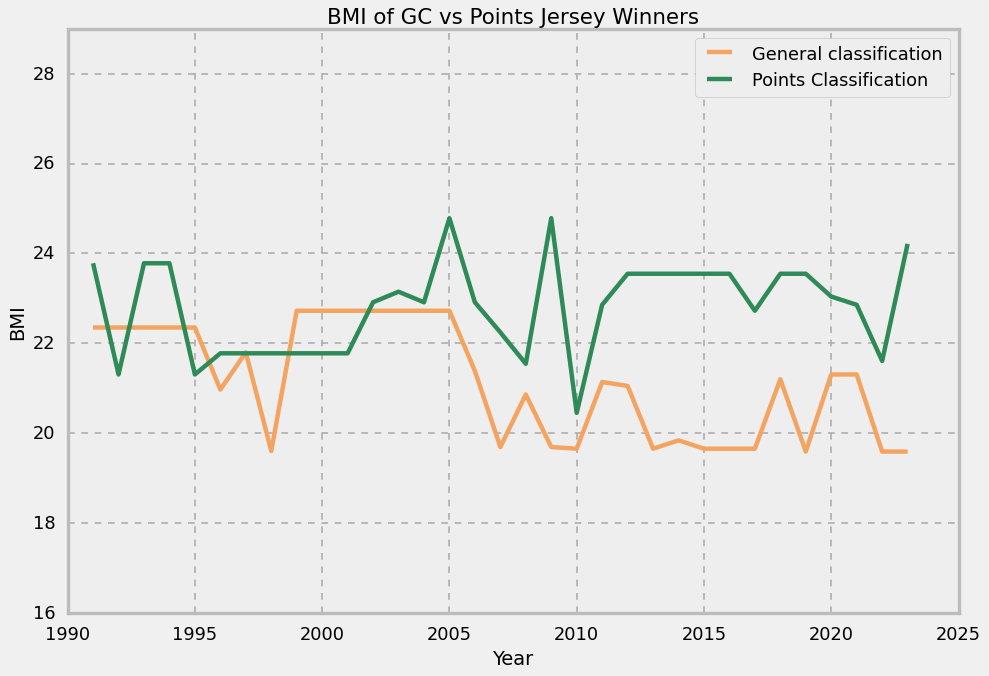

In [145]:
# ---------------------------------------------------------
# ------Visualizing BMI of GC vs. Points Winner------------
# ---------------------------------------------------------

#Read in BMI CSVs
df_s = pd.read_csv('Sprinters_BMI.csv')
df_gc = pd.read_csv('GC_BMI.csv')

#Drop rows from df_gc dataframe so they each have the same number of rows
df_gc.drop([0,1,2,3,4,5], inplace = True)

#Base Plot
plt.plot(df_gc["Year"], df_gc["BMI"], label = "General classification", color = "sandybrown", 
         linewidth=4)
plt.plot(df_s["Year"], df_s["BMI"], label = "Points Classification", color = "seagreen", 
         linewidth=4)

#Ensure Year will be displayed as year rather than offset notation
plt.ticklabel_format(useOffset=False)

#Improve Readability
plt.title("BMI of GC vs Points Jersey Winners") #Title
plt.xlabel("Year") #X axis label
plt.ylabel("BMI") #Y axis label
plt.grid(True) # Show grid lines
plt.legend() #Show legend
plt.style.use('seaborn-v0_8-poster')

plt.ylim(16, 29)


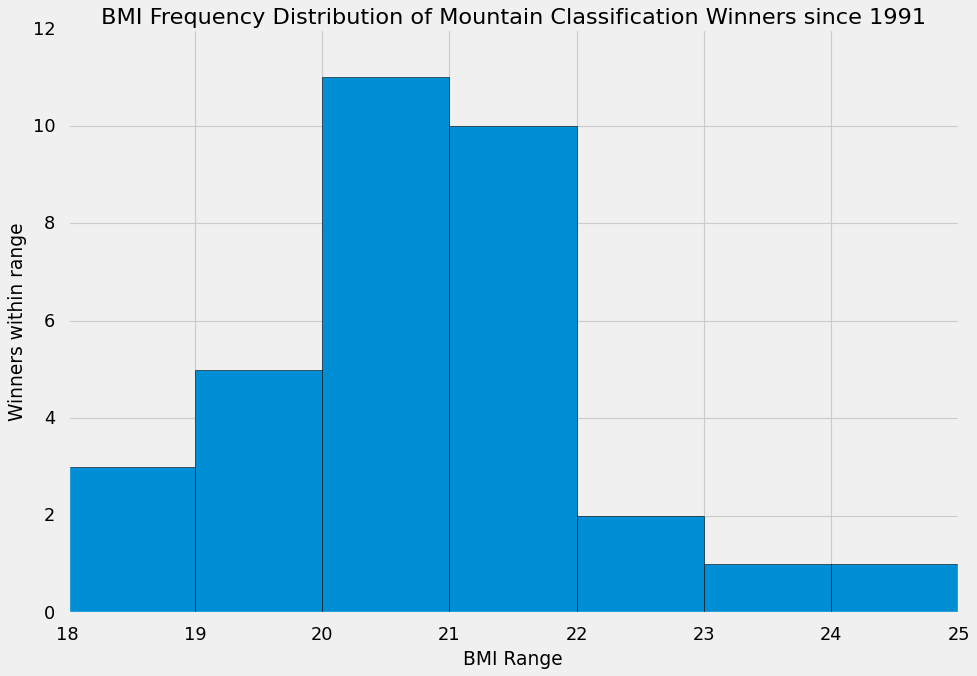

In [152]:
#--------------------------------------------------------
#------Histogram to show BMI spread of KOM Winners-------
#--------------------------------------------------------

bins = [18,19,20,21,22,23,24,25] #Create Bins

#Base Plot
plt.hist(df_c["BMI"], bins=bins, edgecolor='black')

#Improve Readability
plt.title("BMI Frequency Distribution of Mountain Classification Winners since 1991")
plt.xlabel("BMI Range")
plt.ylabel("Winners within range")
plt.style.use("fivethirtyeight")




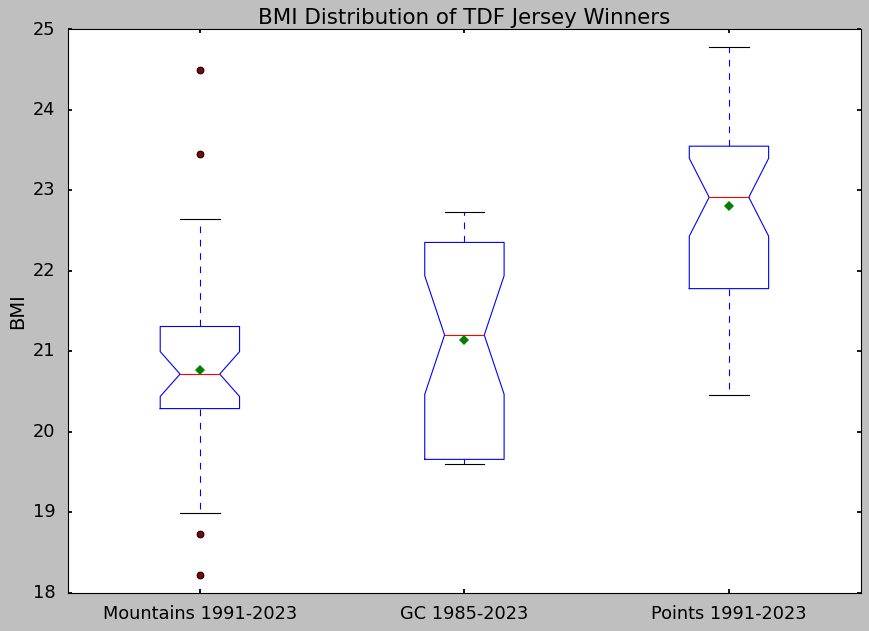

In [164]:
#------------------------------------------------------------------------------
#-----Box and Whiskers to show BMI distribution of different types of cyclists-
#------------------------------------------------------------------------------
df_c = pd.read_csv('Climbers_BMI.csv') #Read in Climbers CSV


red_circle = dict(markerfacecolor='darkred', marker='o') #Make outliers red
mean_shape = dict(markerfacecolor='green', marker='D', 
                  markeredgecolor='green') # make mean a green diamond


#Base Plot
plt.boxplot([df_c["BMI"],df_gc["BMI"], df_s["BMI"]], labels=["Mountains 1991-2023","GC 1985-2023",
            "Points 1991-2023"], flierprops=red_circle, showmeans=True, meanprops=mean_shape,
              notch=True) #Make Plot

#Improve Readability
plt.title("BMI Distribution of TDF Jersey Winners")
plt.ylabel("BMI")
plt.style.use("seaborn-v0_8-poster")